In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from random import random

In [3]:
df = pd.read_csv('calving.csv')

In [4]:
df.columns.values

array(['ID', 'LACT', 'Time_Born', 'AdjTime', 'N_CALVES', 'CSEX',
       'NUM_DEAD', 'AGEFDAT', 'CINT', 'GEST', 'PDIM', 'DDRY', 'PDOPN',
       'PREFR', 'PTOTF', 'PTOTM', 'PTOTS', 'EASE', 'Time',
       'Raw_Activity_Data', 'Activity_Change',
       'Activity_Change_by_2_Hours', 'Rumination_Raw_Data',
       'Weighted_Rumination_Change', 'Rumination_Deviation_by_2_Hours',
       'Total_Rumination_Minutes_In_Last', 'Daily_Rumination',
       'Weekly_Rumination_Average', 'Group', 'new_health_index',
       'Daily_activity', 'parity', 'Day', 'Period', 'CalvingYN', 'newvar',
       'period_to_calving'], dtype=object)

In [5]:
data = df.sample(frac=1)

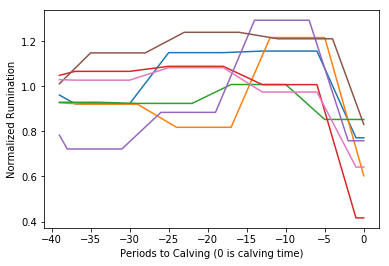

In [10]:
# data["Rumination_Raw_Data"] /= data["Weekly_Rumination_Average"]

cow_dict = defaultdict(list)

# print(data.to_dict("records"))

for row in data.to_dict("records"):
#     print(int(row["ID"]))
    cow_dict[int(row["ID"])].append(row)
#     print(len(cow_dict[int(row["ID"])]))

sample_val = .01

for ID in set(cow_dict.keys()):
    if random() < sample_val:
#         points = [(element["period_to_calving"], (element["Daily_Rumination"] / element["Weekly_Rumination_Average"])) \
#                   for element in cow_dict[ID] if element["period_to_calving"] > -40]
        
        frame = pd.DataFrame(cow_dict[ID])
        frame = frame.sort_values(by="period_to_calving")
#         print(frame)
#         print(frame["Daily_Rumination"].rolling(window=5).mean())
        averages = list((frame["Daily_Rumination"] / frame["Daily_Rumination"].mean()).rolling(window=5).mean())
#         print(averages)
        
        points = []
        
        for index, datum in enumerate(averages):
#             print(datum)
#             print(index)
            i = index - len(averages) + 1
            points.append([i, datum])
        
        points = [point for point in points if point[0] > -40]
        periods = [elem[0] for elem in points]
        ruminations = [elem[1] for elem in points]
        
        if len(points) > 30:
            plt.plot(periods, ruminations)
            
plt.xlabel("Periods to Calving (0 is calving time)")
plt.ylabel("Normalized Rumination")

plt.show()

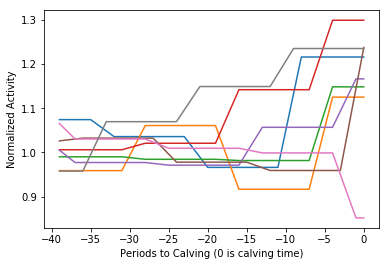

In [12]:
# data["Rumination_Raw_Data"] /= data["Weekly_Rumination_Average"]

cow_dict = defaultdict(list)

# print(data.to_dict("records"))

for row in data.to_dict("records"):
#     print(int(row["ID"]))
    cow_dict[int(row["ID"])].append(row)
#     print(len(cow_dict[int(row["ID"])]))

sample_val = .01

for ID in set(cow_dict.keys()):
    if random() < sample_val:
#         points = [(element["period_to_calving"], (element["Daily_Rumination"] / element["Weekly_Rumination_Average"])) \
#                   for element in cow_dict[ID] if element["period_to_calving"] > -40]
        
        frame = pd.DataFrame(cow_dict[ID])
        frame = frame.sort_values(by="period_to_calving")
#         print(frame)
#         print(frame["Daily_Rumination"].rolling(window=5).mean())
        averages = list((frame["Daily_activity"] / frame["Daily_activity"].mean()).rolling(window=3).mean())
#         print(averages)
        
        points = []
        
        for index, datum in enumerate(averages):
#             print(datum)
#             print(index)
            i = index - len(averages) + 1
            points.append([i, datum])
        
        points = [point for point in points if point[0] > -40]
        periods = [elem[0] for elem in points]
        ruminations = [elem[1] for elem in points]
        
        if len(points) > 30:
            plt.plot(periods, ruminations)

plt.xlabel("Periods to Calving (0 is calving time)")
plt.ylabel("Normalized Activity")
            
plt.show()